# MNIST Digit Classifier - 99% Accuracy with less than 10k parameters.



In [0]:
# Importing required Libraries.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, ReLU
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Loading Dataset & Normalizing the pixel values between 0 to 1.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

Testing the entry for Image and Label.


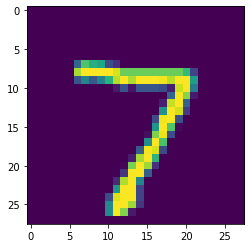


 This is a 7.


In [3]:
# Checking the Data.
print("Testing the entry for Image and Label.")
plt.imshow(test_images[0])
plt.show()
print(f"\n This is a {test_labels[0]}.")

In [4]:
# Creating the Model.

model = Sequential([
                    Conv2D(16, 5, input_shape=(28, 28, 1)),
                    BatchNormalization(),
                    ReLU(),
                    MaxPool2D(),
                    Conv2D(16, 5),
                    BatchNormalization(),
                    ReLU(),
                    MaxPool2D(),
                    Flatten(),
                    Dropout(0.3),
                    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 16)        64        
_________________________________________________________________
re_lu (ReLU)                 (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          6416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 16)          0

In [0]:
# Compiling the Model.
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = ["accuracy"]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [6]:
# Training the Model & Validating the Data.

history = model.fit(train_images[..., np.newaxis], 
                    train_labels, epochs=15, 
                    validation_data=(test_images[..., np.newaxis], test_labels), batch_size=10)

Epoch 1/15
6000/6000 [==============================] - 25s 4ms/step - loss: 0.1852 - accuracy: 0.9424 - val_loss: 0.0540 - val_accuracy: 0.9814
Epoch 2/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0814 - accuracy: 0.9749 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 3/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0624 - accuracy: 0.9805 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 4/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0292 - val_accuracy: 0.9907
Epoch 5/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.0310 - val_accuracy: 0.9893
Epoch 6/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 7/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0354 - val_ac

In [7]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.185212,0.942383,0.053998,0.9814
1,0.081354,0.974867,0.038174,0.9875
2,0.062444,0.980467,0.034403,0.9887
3,0.054514,0.982633,0.029238,0.9907
4,0.050352,0.984050,0.030984,0.9893
5,0.046921,0.985400,0.028862,0.9908
6,0.042360,0.986933,0.035427,0.9887
7,0.040819,0.987367,0.025124,0.9925
8,0.038556,0.987933,0.026650,0.9918
9,0.037426,0.987983,0.024765,0.9918


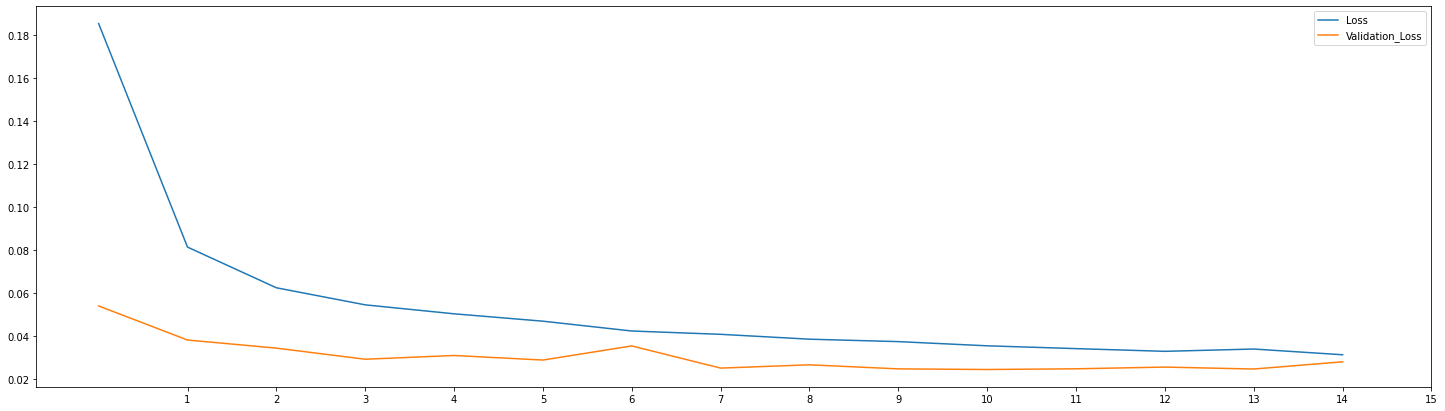

In [8]:
# Plotting Accuracy and Validation Loss.
plt.figure(figsize=(25,7))
plt.plot(df["loss"])
plt.plot(df["val_loss"])
plt.xticks(np.arange(1, 16))
plt.legend(["Loss", "Validation_Loss"])


In [9]:
model_val_acc = round(df["val_accuracy"].iloc[-1]*100,2)
print(f"The Model's Validation Accuracy based on Test Dataset = {model_val_acc}")

The Model's Validation Accuracy based on Test Dataset = 99.14


### Completed MNIST Digit Classifier - Above 99% Accuracy with less than 10k parameters.